In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import iqr
import numpy as np

nba = pd.read_csv('nba-players.csv')
nba.head()

,Unnamed: 0,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


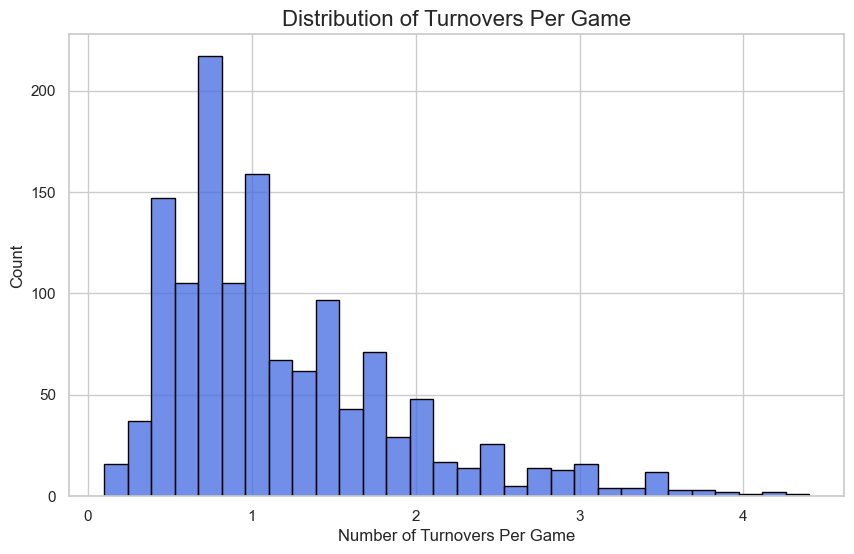

In [5]:
sns.set_theme(style="whitegrid")

# create histogram
plt.figure(figsize=(10, 6))
sns.histplot(nba['tov'], bins=30, kde=False, color="royalblue", edgecolor="black")

plt.xlabel('Number of Turnovers Per Game')
plt.ylabel('Count')
plt.title('Distribution of Turnovers Per Game', fontsize=16)

plt.show()

In [6]:
tov_summary = {
    'sd': np.std(nba['tov'], ddof=1),
    'mean': np.mean(nba['tov']),
    'median': np.median(nba['tov']),
    'IQR': iqr(nba['tov'])
}

tov_summary_df = pd.DataFrame([tov_summary])
tov_summary_df

,sd,mean,median,IQR
0,0.722541,1.193582,1.0,0.8


C:\Users\carme\AppData\Local\Temp\ipykernel_19328\3290245524.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_filtered['above_avr_tov'] = (nba_filtered['tov'] > avr_turnover).astype(int)
C:\Users\carme\AppData\Local\Temp\ipykernel_19328\3290245524.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_filtered['above_avr_tov'] = nba_filtered['above_avr_tov'].astype('category')


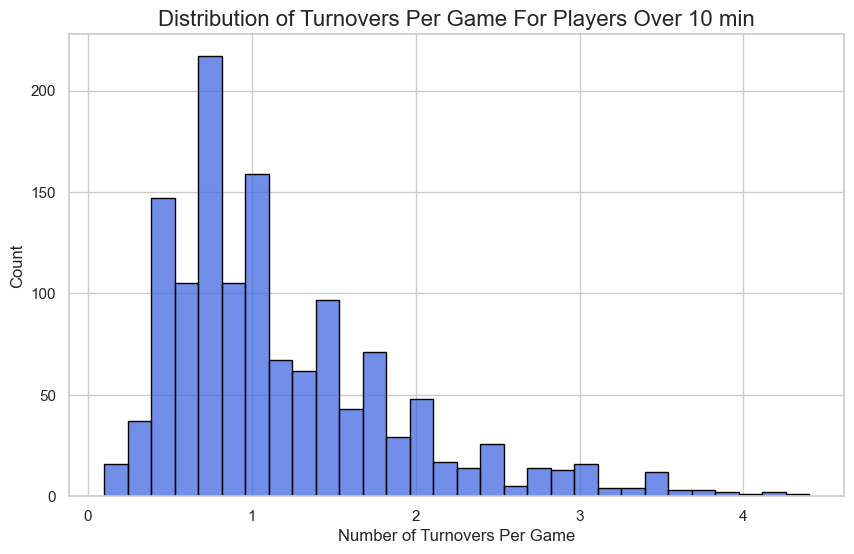

In [7]:
nba_filtered = nba[nba['min'] > 10]
avr_turnover = nba_filtered['tov'].mean()
nba_filtered['above_avr_tov'] = (nba_filtered['tov'] > avr_turnover).astype(int)
nba_filtered['above_avr_tov'] = nba_filtered['above_avr_tov'].astype('category')

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(nba['tov'], bins=30, kde=False, color="royalblue", edgecolor="black")

plt.xlabel('Number of Turnovers Per Game')
plt.ylabel('Count')
plt.title('Distribution of Turnovers Per Game For Players Over 10 min', fontsize=16)

sns.set(style="white", context="talk")


plt.show()

In [8]:
tov_data = nba[['tov']]

summary = {
    'sd': np.std(tov_data['tov'], ddof=1),
    'mean': np.mean(tov_data['tov']),
    'median': np.median(tov_data['tov']),
    'IQR': iqr(tov_data['tov'])
}

tov_summary_df = pd.DataFrame([summary])
tov_summary_df

,sd,mean,median,IQR
0,0.722541,1.193582,1.0,0.8


In [9]:
count_above_avr_tov = nba_filtered['above_avr_tov'].value_counts()
print(count_above_avr_tov)

above_avr_tov
0    645
1    425
Name: count, dtype: int64


In [10]:
below = 645
above = 425 

#Prob of below
prob_below = below/(below+above)
print(prob_below)

#Prob of above
prob_above = above/(above+below)
print(prob_above)

0.602803738317757
0.397196261682243


C:\Users\carme\AppData\Local\Temp\ipykernel_19328\2172598350.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="min", y="above_avr_tov", data=nba_filtered, ax=axes[0], palette=["lightgreen"])
C:\Users\carme\AppData\Local\Temp\ipykernel_19328\2172598350.py:5: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x="min", y="above_avr_tov", data=nba_filtered, ax=axes[0], palette=["lightgreen"])
C:\Users\carme\AppData\Local\Temp\ipykernel_19328\2172598350.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="pts", y="above_avr_tov", data=nba_filtered, ax=axes[1], palette=["lightblue"])
C:\Users\carme\

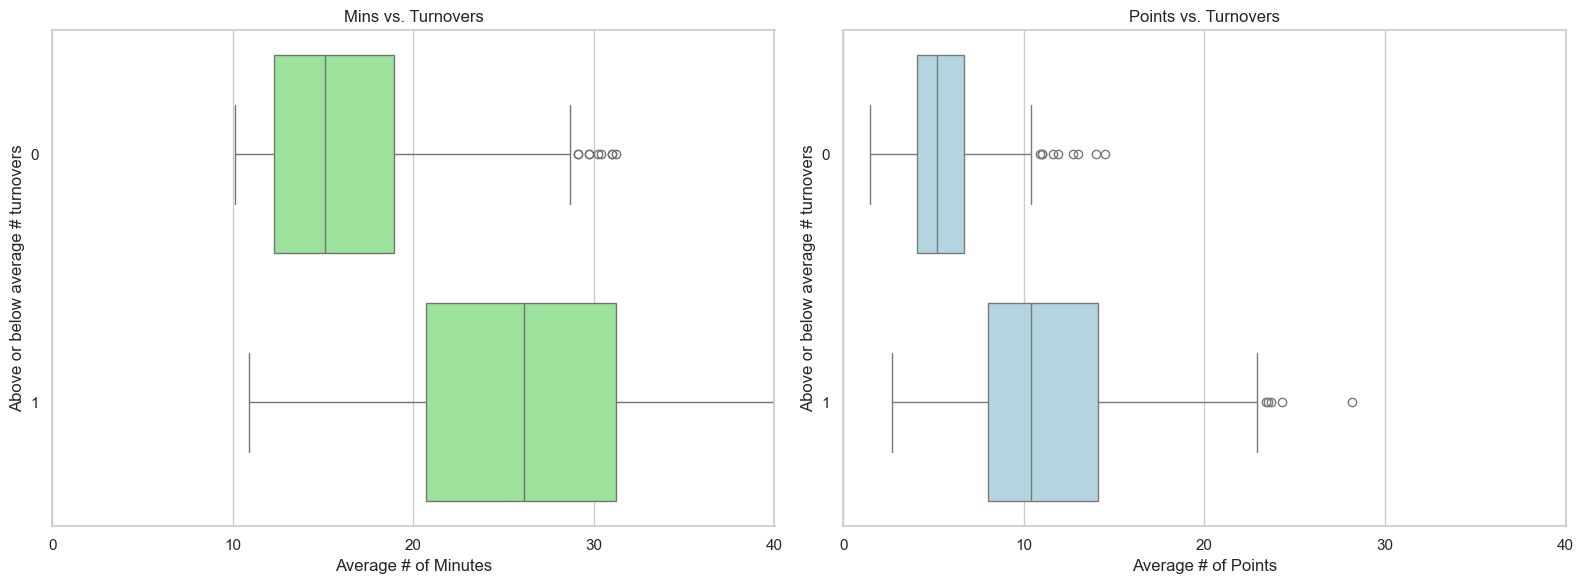

In [11]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(16, 6)) 

sns.boxplot(x="min", y="above_avr_tov", data=nba_filtered, ax=axes[0], palette=["lightgreen"])
axes[0].set_title('Mins vs. Turnovers')
axes[0].set_xlabel('Average # of Minutes')
axes[0].set_ylabel('Above or below average # turnovers')
axes[0].set_xlim(0, 40)
axes[0].set_xticks(range(0, 41, 10)) 

sns.boxplot(x="pts", y="above_avr_tov", data=nba_filtered, ax=axes[1], palette=["lightblue"])
axes[1].set_title('Points vs. Turnovers')
axes[1].set_xlabel('Average # of Points')
axes[1].set_ylabel('Above or below average # turnovers')
axes[1].set_xlim(0, 40)
axes[1].set_xticks(range(0, 41, 10)) 

plt.tight_layout()
plt.show()

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Model 1 --> all features included
X = nba[['pts', 'reb', 'stl', 'target_5yrs']].values 
y = nba['tov'].values  

linear_model = LinearRegression()
linear_model.fit(X, y)

predicted = linear_model.predict(X)

mse = mean_squared_error(y_true=y, y_pred=predicted)
r_squared = r2_score(y_true=y, y_pred=predicted)

print("Mean Squared Error:", mse)
print("R^2 Score:", r_squared)

Mean Squared Error: 0.11723170704018673
R^2 Score: 0.7752783711541398


In [24]:
#Model 2 --> we took away steals 

X = nba[['pts', 'reb', 'target_5yrs']].values 
y = nba['tov'].values  

linear_model = LinearRegression()
linear_model.fit(X, y)

predicted = linear_model.predict(X)

mse = mean_squared_error(y_true=y, y_pred=predicted)
r_squared = r2_score(y_true=y, y_pred=predicted)

print("Mean Squared Error:", mse)
print("R^2 Score:", r_squared)

Mean Squared Error: 0.14293033516626066
R^2 Score: 0.7260166337163688
